In [226]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import keras.losses
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import random as rnd

In [227]:
def normalize(data):
    tmp = [((item - min(data)) / ((max(data)-min(data)))) for item in data]
    return np.array(tmp)

In [228]:
def isExter(closee, i):
    if closee[i-1] < closee[i] and closee[i] < closee[i+1]:
        return False
    elif closee[i-1] > closee[i] and closee[i] > closee[i+1]:
        return False
    else: 
        return True

In [229]:
def isMin(lst, indx):
    if indx < len(lst) - 1:
        if lst[indx + 1] > lst[indx]:
            return True
        else:
            return False
    else:
        if lst[indx - 1] > lst[indx]:
            return True
        else:
            return False

In [230]:
data = pd.read_csv('khodro.csv')
closePrice, volume = normalize(data['Close']), normalize(data['Volume'])
# compact = [[p, v] for p, v in zip(closePrice, volume)]
# compact.pop(-1)

In [231]:
pointKind = [0]*len(closePrice)

for i in range(1, len(closePrice)-1):
    if isExter(closePrice, i):
        pointKind[i] = 1
    if pointKind[i] != 0:
        if isMin(closePrice, i):
            pointKind[i] = -1
        else:
            pointKind[i] = 1

In [232]:
def rmve(close, remo):
    return np.delete(close, remo)

In [233]:
import random

In [234]:
for tmp in range(1000):

    extermoms = []
    for i in range(len(pointKind)):
        if pointKind[i] != 0: extermoms.append(i)


    removes = []
    for i in range(0, len(extermoms)-3, 4):
        try:
            if closePrice[extermoms[i]] > closePrice[extermoms[i+2]] and closePrice[extermoms[i+1]] > closePrice[extermoms[i+3]] and (abs(closePrice[extermoms[i+1]] - closePrice[extermoms[i+2]]) < (abs(closePrice[extermoms[i]] - closePrice[extermoms[i+2]]) + closePrice[extermoms[i+1]] - closePrice[extermoms[i+3]])):
                # removes.append(i+1)
                tmp = abs(closePrice[extermoms[i]] - closePrice[extermoms[i+3]]) / 3
                closePrice[extermoms[i+1]] = 1#closePrice[extermoms[i]] - tmp
                closePrice[extermoms[i+2]] = 1#closePrice[extermoms[i]] - 2*tmp
                # removes.append(i+2)
            if closePrice[extermoms[i]] < closePrice[extermoms[i+2]] and closePrice[extermoms[i+1]] < closePrice[extermoms[i+3]] and (abs(closePrice[extermoms[i+1]] - closePrice[extermoms[i+2]]) < (abs(closePrice[extermoms[i]] - closePrice[extermoms[i+2]]) + closePrice[extermoms[i+1]] - closePrice[extermoms[i+3]])):
                # removes.append(i+1)
                # removes.append(i+2) 
                tmp = abs(closePrice[extermoms[i]] - closePrice[extermoms[i+3]]) / 3
                closePrice[extermoms[i+1]] = 1#closePrice[extermoms[i]] + tmp
                closePrice[extermoms[i+2]] = 1#closePrice[extermoms[i]] + 2*tmp
                

        except:
            print(i)

    # for i in range(len(removes)):
    # removeClose = []
    # for i in range(len(removes)):
    #     removeClose.append(extermoms[removes[i]])
    # closePrice = rmve(closePrice, removeClose)
    # pointKind = rmve(pointKind, removeClose)
    #extermoms = rmve(extermoms, removes)
    


In [235]:
temp = []
for i in range(len(closePrice)):
    if closePrice[i] == 1:
        temp.append(i)

ajab = rmve(closePrice, temp)

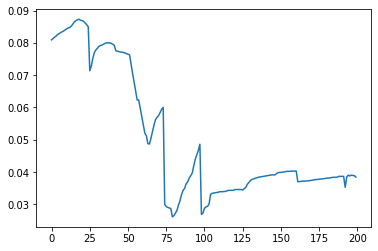

In [246]:
plt.plot(ajab[:200], 'C0')

In [240]:
print(len(ajab))

2663


In [238]:
closePrice2 = normalize(data['Close'])

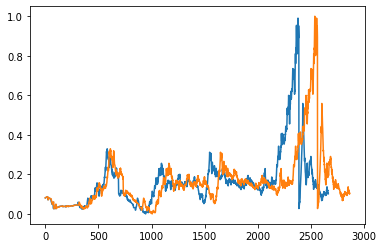

In [243]:

plt.plot(ajab, 'C0')

#plt.plot(closePrice2, 'C1')